In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import util

1. Зашумить изображение при помощи шума гаусса, постоянного шума.

In [11]:
img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

In [12]:
gn = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gn = cv2.add(img, gn)

In [13]:
spn = np.random.randint(0, 2, size=img.shape).astype(np.uint8) * 255
img_sp = cv2.add(img, spn)

2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [14]:
mf_gn = cv2.medianBlur(img_gn, 5)
mf_sp = cv2.medianBlur(img_sp, 5)

In [15]:
gf_gn = cv2.GaussianBlur(img_gn, (5, 5), 0)
gf_sp = cv2.GaussianBlur(img_sp, (5, 5), 0)

In [16]:
bf_gn = cv2.bilateralFilter(img_gn, 9, 75, 75)
bf_sp = cv2.bilateralFilter(img_sp, 9, 75, 75)

In [17]:
nlm_gn = cv2.fastNlMeansDenoising(img_gn, None, 10, 7, 21)
nlm_sp = cv2.fastNlMeansDenoising(img_sp, None, 10, 7, 21)

3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

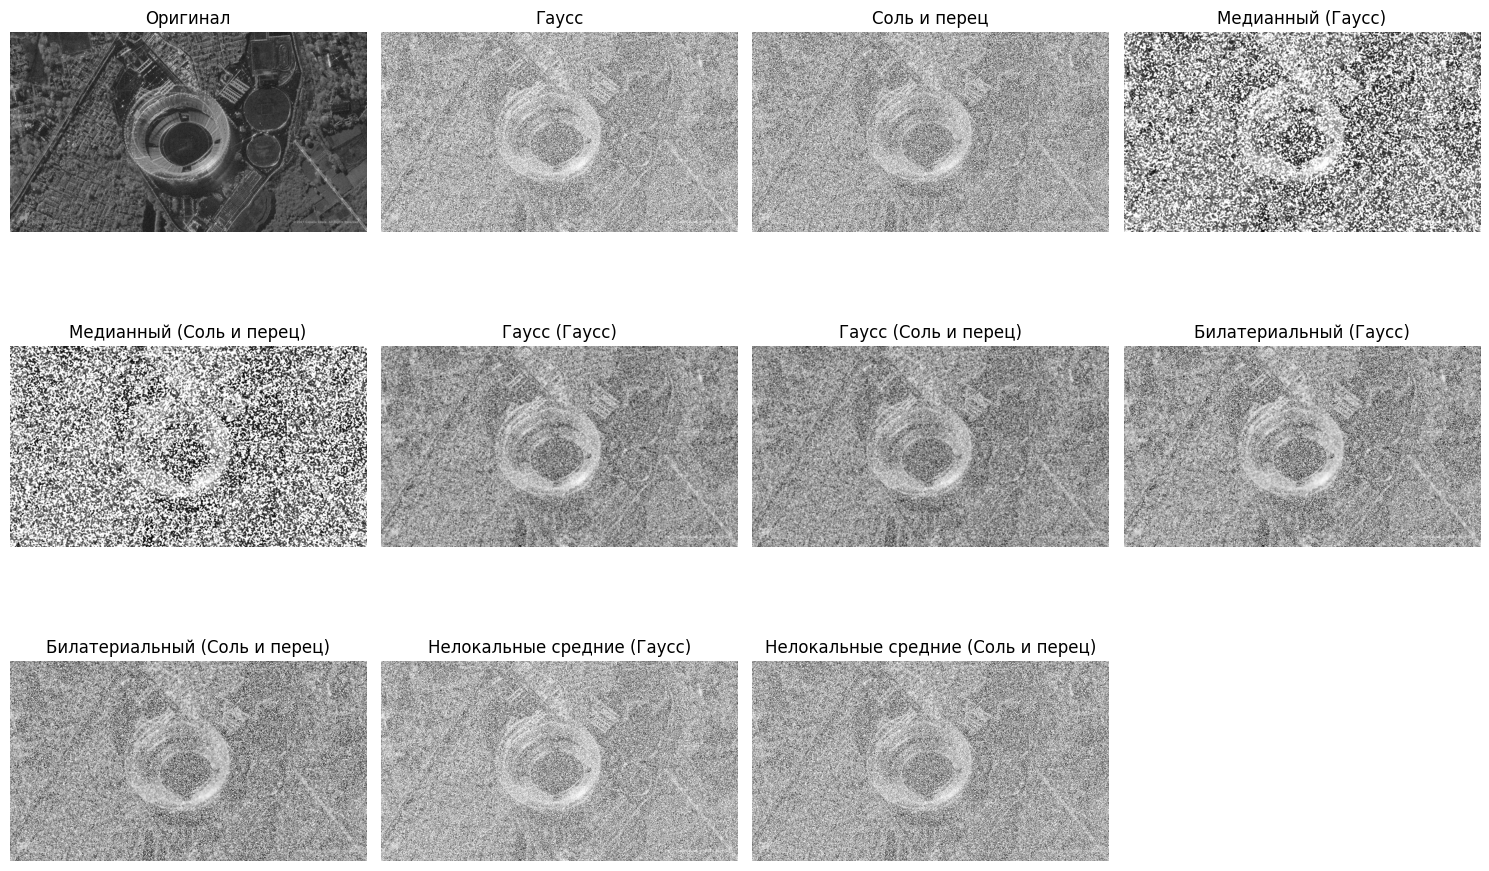

PSNR для медианного фильтра (Гаусс): 27.53886868048401
PSNR для фильтра Гаусса (Гаусс): 27.859956747236772
PSNR для билатериального фильтра (Гаусс): 27.62053529157898
PSNR для нелокальных средних (Гаусс): 28.10635763505616
PSNR для медианного фильтра (Соль и перец): 28.07064551043878
PSNR для фильтра Гаусса (Соль и перец): 27.786757654502377
PSNR для билатериального фильтра (Соль и перец): 28.269020646570997
PSNR для нелокальных средних (Соль и перец): 30.6114165589998


In [18]:
titles = ['Оригинал', 'Гаусс', 'Соль и перец',
          'Медианный (Гаусс)', 'Медианный (Соль и перец)',
          'Гаусс (Гаусс)', 'Гаусс (Соль и перец)',
          'Билатериальный (Гаусс)', 'Билатериальный (Соль и перец)',
          'Нелокальные средние (Гаусс)', 'Нелокальные средние (Соль и перец)']
images = [img, img_gn, img_sp, mf_gn, mf_sp, gf_gn, gf_sp, bf_gn, bf_sp, nlm_gn, nlm_sp]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

print("PSNR для медианного фильтра (Гаусс):", psnr(img, mf_gn))
print("PSNR для фильтра Гаусса (Гаусс):", psnr(img, gf_gn))
print("PSNR для билатериального фильтра (Гаусс):", psnr(img, bf_gn))
print("PSNR для нелокальных средних (Гаусс):", psnr(img, nlm_gn))

print("PSNR для медианного фильтра (Соль и перец):", psnr(img, mf_sp))
print("PSNR для фильтра Гаусса (Соль и перец):", psnr(img, gf_sp))
print("PSNR для билатериального фильтра (Соль и перец):", psnr(img, bf_sp))
print("PSNR для нелокальных средних (Соль и перец):", psnr(img, nlm_sp))